# NLP and Scoring

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import 	WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreygoel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shreygoel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shreygoel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shreygoel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [31]:
df = pd.read_csv("anime_with_synopsis.csv")
print(len(df))
df.head(10)

16214


,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Sena is like any other shy kid starting high s...
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life","Yuuta Takemoto, a sophomore at an arts college..."
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",Kyosuke Kano has lived under the shadow of his...
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",Takumi Fujiwara finally joins Ryousuke and Kei...
9,19,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...","Dr. Kenzou Tenma, an elite neurosurgeon recent..."


In [32]:
print(df.columns)

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'sypnopsis'], dtype='object')


In [33]:
#Data Cleaning
# Drop all the rows with Unknown in the 'Score' column
print(df[df['Score'] == 'Unknown'].head(5))
df = df[df['Score'] != 'Unknown']
# Drop all the rows with no synopsis information
print(df[df['sypnopsis'] == 'No synopsis information has been added to this title. Help improve our database by adding a synopsis here .'].head(5))
df = df[df['sypnopsis'] != 'No synopsis information has been added to this title. Help improve our database by adding a synopsis here .']
print(f"Length after Removing Unknow entries: {len(df)}" )

      MAL_ID                                               Name    Score  \
1347    1547                                   Obake no Q-tarou  Unknown   
1439    1656                                    PostPet Momobin  Unknown   
1512    1739                         Shibawanko no Wa no Kokoro  Unknown   
1619    1863                            Silk Road Shounen Yuuto  Unknown   
1808    2073  Hengen Taima Yakou Karura Mau! Sendai Kokeshi ...  Unknown   

                                           Genres  \
1347  Comedy, School, Slice of Life, Supernatural   
1439                                 Comedy, Kids   
1512                                         Kids   
1619               Adventure, Fantasy, Historical   
1808                               Horror, Shoujo   

                                              sypnopsis  
1347  Q-taro, a monster, is living with the Ohara fa...  
1439  omo and Komomo can deliver mail from anyone, t...  
1512  Based on a japanese children`s book by Yoshi

In [34]:
#Turing Score into float
df['Score'] = df['Score'].astype(float)
df['sypnopsis'] = df['sypnopsis'].astype(str)
df.reset_index(drop=True, inplace=True)
df.head(10)


,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Sena is like any other shy kid starting high s...
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life","Yuuta Takemoto, a sophomore at an arts college..."
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",Kyosuke Kano has lived under the shadow of his...
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",Takumi Fujiwara finally joins Ryousuke and Kei...
9,19,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...","Dr. Kenzou Tenma, an elite neurosurgeon recent..."


In [35]:
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()

df["tokenized"] = ""
for i in range(len(df)):
    df.loc[i,'sypnopsis'] = df.loc[i,'sypnopsis'].lower()
    df.loc[i,'sypnopsis'] = decontracted(df.loc[i,'sypnopsis'])
    word_tokens = tokenizer.tokenize(df.loc[i,'sypnopsis'])
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(w) for w in word_tokens]
    filtered_sentence = [w for w in lemmatized_tokens if not w in stop_words and not w.isdigit()]
    df.loc[i,'tokenized'] = " ".join(filtered_sentence)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(df['tokenized'].astype(str), df['Score'], test_size=0.25, random_state=42)
# print(X_train)
# print("--------------------")
# print(X_test)

# Preprocess the synopsis text data
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
# X_train = vectorizer.transform(X_train)

X_test = vectorizer.transform(X_test)
# X = vectorizer.fit_transform(df['tokenized'].values.astype('U'))


In [37]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_absolute_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import SGD
# from keras.callbacks import EarlyStopping


# # Define the MLP model
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# # Random siliness cause parameter tuning sucks
# model = Sequential()
# model.add(Dense(4, input_dim=X_train.shape[1], activation='tanh'))
# model.add(Dense(4, activation='tanh'))
# model.add(Dense(4, activation='tanh'))
# # model.add(Dense(4, activation='tanh'))
# # model.add(Dense(3, activation='tanh'))

# # Add an output layer
# model.add(Dense(1))

# # Compile the model
# # compile model with sgd and nesterov momentum
# model.compile(loss='mse', optimizer="sgd") # mean squared error
# # Train the model
# total_epochs = 100

# history = model.fit(X_train.toarray(), y_train, validation_data=(X_val.toarray(), y_val), epochs=total_epochs, batch_size=32, verbose=1)

# # Predict on the test set
# predictions = model.predict(X_test.toarray())

# # Calculate the R^2 score
# r2 = r2_score(y_test, predictions)
# print('R^2 Score:', r2)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print('Mean Squared Error:', mse)

# # Evaluate the mean absolute error
# mae = mean_absolute_error(y_test, predictions)
# print('Mean Absolute Error:', mae)

In [38]:
# epochs = range(1, total_epochs+1)
# loss_train = history.history['loss']
# val_loss = history.history['val_loss']
# plt.plot(loss_train)
# plt.plot(val_loss)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['sypnopsis'].apply(lambda text: sia.polarity_scores(text)['compound'])
df.head(10)

,MAL_ID,Name,Score,Genres,sypnopsis,tokenized,sentiment_score
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","in the year 2071, humanity has colonized sever...",year humanity ha colonized several planet moon...,0.9402
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ...",day another bounty life often unlucky crew beb...,-0.9246
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","vash the stampede is the man with a $$60,000,0...",vash stampede man bounty head reason merciless...,-0.9728
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...,ches individual special power like esp telekin...,-0.0516
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",it is the dark century and the people are suff...,dark century people suffering rule devil vande...,-0.9578
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",sena is like any other shy kid starting high s...,sena like shy kid starting high school trying ...,0.8767
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life","yuuta takemoto, a sophomore at an arts college...",yuuta takemoto sophomore art college share che...,0.9674
7,17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",kyosuke kano has lived under the shadow of his...,kyosuke kano ha lived shadow successful brothe...,0.4404
8,18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",takumi fujiwara finally joins ryousuke and kei...,takumi fujiwara finally join ryousuke keisuke ...,0.9744
9,19,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...","dr. kenzou tenma, an elite neurosurgeon recent...",dr kenzou tenma elite neurosurgeon recently en...,-0.9880


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack


# Preprocess the synopsis text data
vectorizer = CountVectorizer(max_features=20000, ngram_range=(1, 2))
vectorizer.fit(df['tokenized'])
X = vectorizer.transform(df['tokenized'])
X_sentiment = hstack((X, df['sentiment_score'].values[:, None]))

X_train, X_test, y_train, y_test = train_test_split(X_sentiment, df['Score'], test_size=0.25, random_state=42)

In [41]:
from transformers import BertModel, BertTokenizer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import torch
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Load BERT model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the 'synopsis' column
tokens = df['sypnopsis'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))
max_len = max(map(len, tokens))
padded_tokens = np.array([i + [0]*(max_len-len(i)) for i in tokens.values])
attention_mask = np.where(padded_tokens != 0, 1, 0)
input_ids = torch.tensor(padded_tokens)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

# Get BERT embeddings
features = last_hidden_states[0][:,0,:].numpy()

# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['sypnopsis'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Combine BERT embeddings and sentiment scores
X = hstack((features, df['sentiment_score'].values[:, None]))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, df['Score'], test_size=0.25, random_state=42)

# Train MLPRegressor
regressor = MLPRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = regressor.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

# Evaluate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 17167810560 bytes.

R^2 Score: -14.81992279547901
Mean Squared Error: 13.560931040356296
Mean Absolute Error: 2.6033042882591357


In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.layers import Embedding, SimpleRNN
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras import regularizers


# # Preprocess the synopsis text data
# tokenizer = Tokenizer(num_words=1000)
# tokenizer.fit_on_texts(df['sypnopsis'].values.astype('U'))
# sequences = tokenizer.texts_to_sequences(df['sypnopsis'].values.astype('U'))

# # Pad the sequences
# X = pad_sequences(sequences)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, df['Score'], test_size=0.2, random_state=42)

# # Define the LSTM model with dropout and regularization
# model = Sequential()
# model.add(Embedding(1000, 32))
# model.add(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.5))
# model.add(LSTM(64, kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.5))
# model.add(Dense(1))

# # Compile the model
# model.compile(loss='mean_squared_error', optimizer="adam")

# # Train the model
# total_epochs = 20
# history = model.fit(X_train, y_train, epochs=total_epochs, batch_size=64, verbose=1)

# # Predict on the test set
# predictions = model.predict(X_test)

# # Calculate the R^2 score
# r2 = r2_score(y_test, predictions)
# print('R^2 Score:', r2)

## Using Word2Vec

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df['tokenized'].astype(str), df['Score'], test_size=0.25, random_state=42)
# print(len(X_train))

# w2v_model = Word2Vec(min_count=2, window=3, vector_size=1500, workers=4)
# w2v_model.build_vocab(df['tokenized'])
# w2v_model.train(df['tokenized'], total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

# def vectorize(list_of_tokens):
#     vector = []
#     for tokens in list_of_tokens:
#         sum = 0
#         n = 0
#         for token in tokens:
#             try:
#                 sum += w2v_model.wv[token]
#             except KeyError:
#                 sum += 0
#             finally:
#                 n += 1
#         vector.append(sum/n)
#     return vector

# X_train = vectorize(X_train)
# X_test = vectorize(X_test)
# print(X_train)

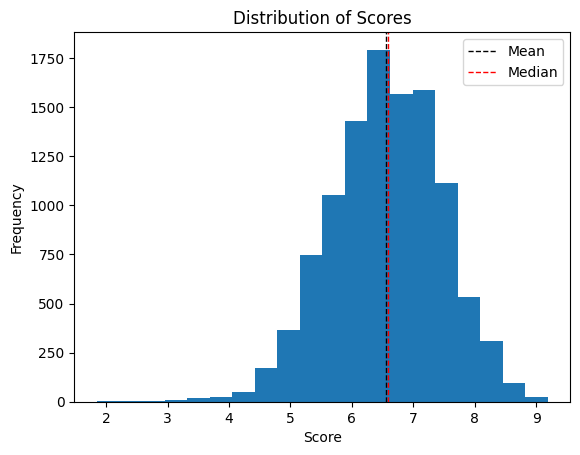

In [ ]:
# Write code to plot the distribution of scores showing mean and median scores
plt.hist(df['Score'], bins=20)
plt.axvline(df['Score'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['Score'].median(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.legend(['Mean', 'Median'])
plt.show()